## important channels

- EOG002
- BIO004 is ECG (ECG003 not working proper when data was recorded)
- BIO005 is data of Breathfrequency
- EEG001-EEG030 (EEG electrodes / channels 1-30)
- MEG0111-MEG2642 (MEG electrodes / channels 111-2642)

In [1]:
import numpy as np
import pandas as pd
import mne
import os
import matplotlib.pyplot as plt
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

%matplotlib qt

In [3]:
raw = mne.io.read_raw_fif('ICA000_eog_raw.fif', preload=True)

Opening raw data file ICA000_eog_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/ICA000_eog_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...


Effective window size : 4.096 (s)


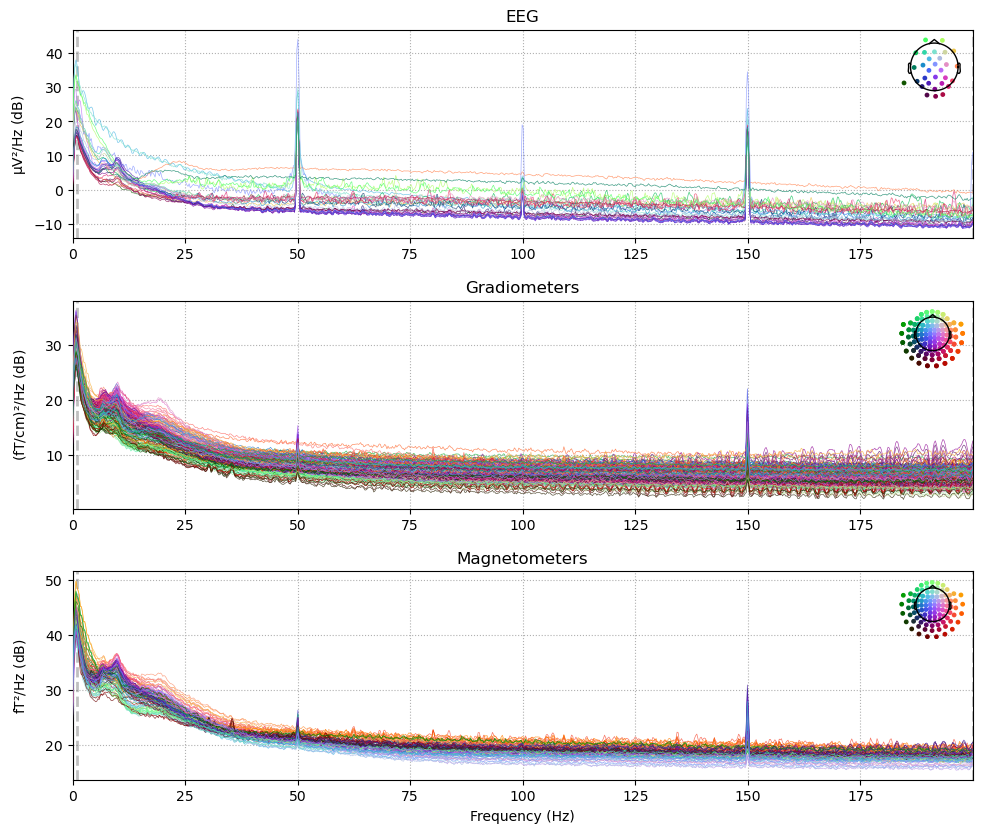

In [3]:
raw.compute_psd(fmax=200).plot(picks="data", exclude="bads")

In [ ]:
raw.plot(duration=5, n_channels=20, scalings='auto')

In [5]:
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]

In [6]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is 

[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]

In [3]:
ica = ICA(n_components=30,method='picard', max_iter="auto", random_state=97)
ica.fit(raw)
ica

Fitting ICA to data using 336 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 581.4s.


Method,picard
Fit parameters,max_iter=500
Fit,149 iterations on raw data (2111000 samples)
ICA components,30
Available PCA components,336
Channel types,"mag, grad, eeg"
ICA components marked for exclusion,—


In [22]:
explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.8410628850527457
Fraction of mag variance explained by all components: 0.9597365141843857
Fraction of grad variance explained by all components: 0.8230779322475659


In [13]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=32, n_times=2111000
    Range : 25000 ... 2135999 =     50.000 ...  4271.998 secs
Ready.


In [14]:
ica.plot_components()

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 10 Axes>]

In [27]:
n_comp = list(range(25))

# Loop over each component index
for n in range(30):
    # blinks
    ica.plot_overlay(raw, exclude=[n], picks="eeg")
    # heartbeats
    ica.plot_overlay(raw, exclude=[n], picks="mag")
    # Plot ICA components with interactive labeling
    ica.plot_components(picks=n, title=f'Component {n + 1}', colorbar=True)

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing o

C:\Users\chrim\anaconda3\lib\site-packages\mne\viz\_mpl_figure.py:2373: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing o

In [11]:
ica.plot_properties(raw, picks=[0, 1])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1559 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1559 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [28]:
# Exclude components related to EOG
ica.exclude = []
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude += eog_indices

# Exclude components related to ECG
ecg_indices, ecg_scores = ica.find_bads_ecg(raw)
ica.exclude += ecg_indices

Using EOG channel: EOG002
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using threshold: 0.23 for CTPS ECG detection
Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped


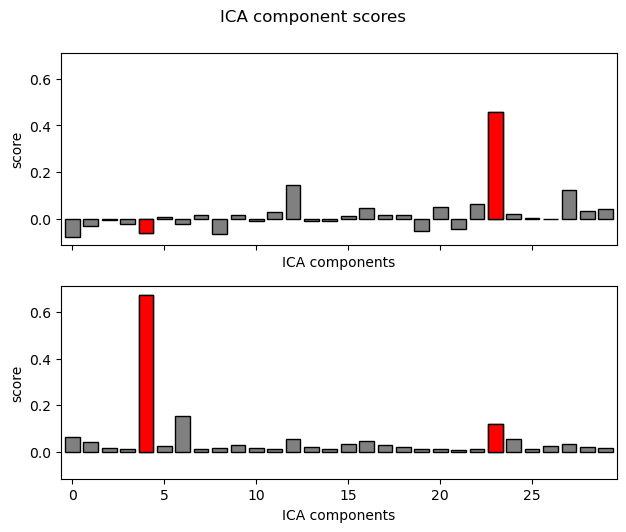

In [29]:
# Plot scores for both EOG and ECG
ica.plot_scores([eog_scores, ecg_scores])
#plt.show()

In [30]:
# Plot diagnostics for both EOG and ECG
ica.plot_properties(raw, picks=ica.exclude)
#plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1559 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1559 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [12]:
# Plot ICs applied to raw data, with both EOG and ECG matches highlighted
ica.plot_sources(raw, show_scrollbars=False)
#plt.show

Creating RawArray with float64 data, n_channels=32, n_times=2111000
    Range : 25000 ... 2135999 =     50.000 ...  4271.998 secs
Ready.
Using qt as 2D backend.


Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


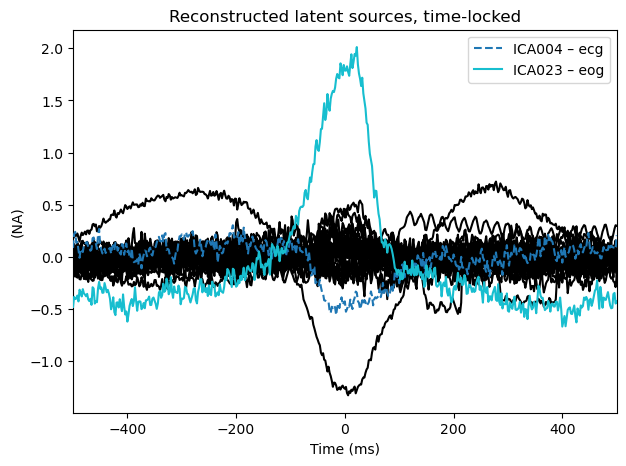

In [31]:
# Plot ICs applied to the averaged EOG epochs, with both EOG and ECG matches highlighted
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
ica.plot_sources(eog_evoked)
#plt.show()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


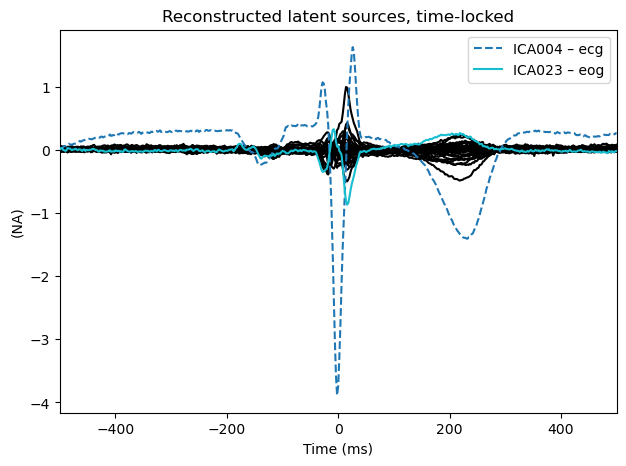

In [32]:
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw).average()
ica.plot_sources(ecg_evoked)
#plt.show()

In [15]:
ica.exclude = [23]  # indices chosen based on various plots above

In [16]:
reconstr_raw = raw.copy()

In [17]:
ica.apply(reconstr_raw)

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components


<Raw | pre_filtered_data_raw.fif, 343 x 2111000 (4222.0 s), ~5.40 GB, data loaded>

In [18]:
reconstr_raw.save('ICA023_ecg_raw.fif', overwrite=True)

Writing /home/ijekt/Documents/cs_cog_fat/ICA023_ecg_raw.fif
Closing /home/ijekt/Documents/cs_cog_fat/ICA023_ecg_raw.fif
Writing /home/ijekt/Documents/cs_cog_fat/ICA023_ecg_raw-1.fif
Closing /home/ijekt/Documents/cs_cog_fat/ICA023_ecg_raw-1.fif
[done]


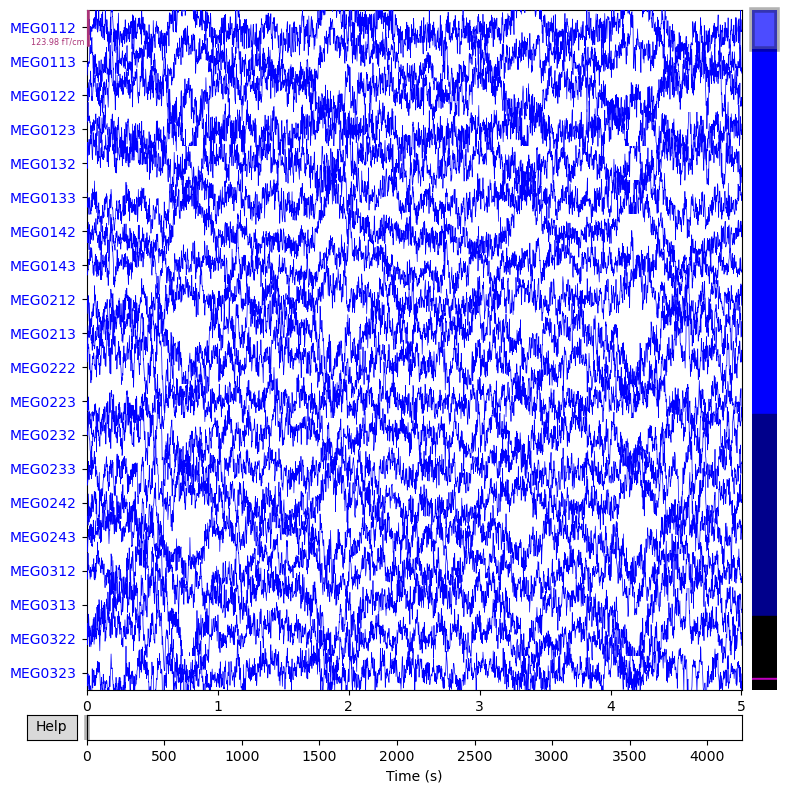

Channels marked as bad:
none
Channels marked as bad:
none


In [45]:
raw.plot(duration=5, n_channels=20, scalings='auto')

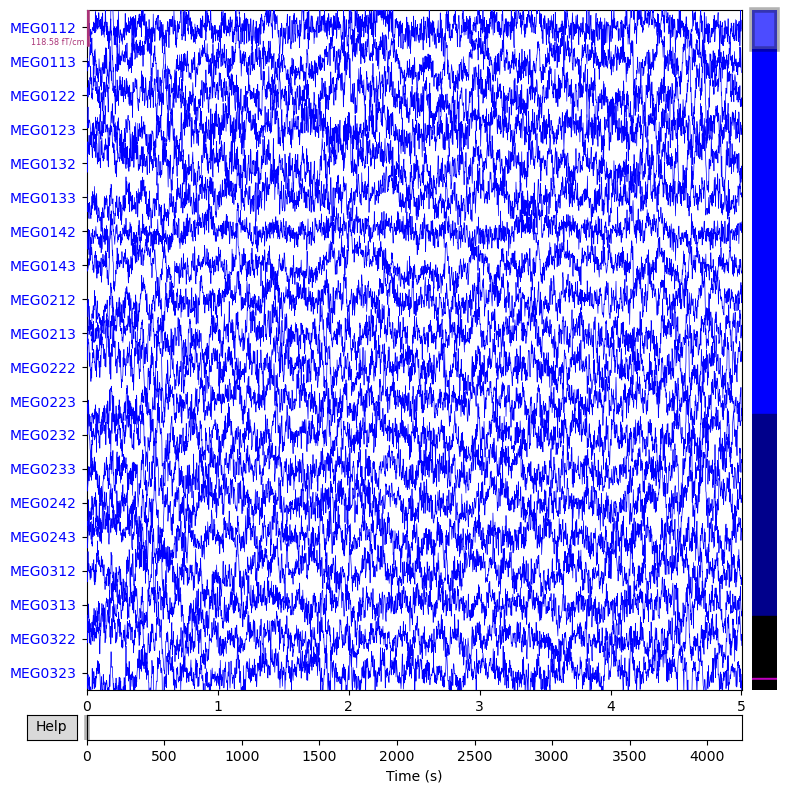

In [44]:
reconstr_raw.plot(duration=5, n_channels=20, scalings='auto')